## <CENTER> Notebook test
______________________________________________

### This is an example notebook using ROOT libraries from python. You can play around here and experiment, and you can also create several separate notebooks for specific studies.

### Best of luck!
_____________________________________________

In [1]:
# to use standard python modules, you import them
import math

# in order to use ROOT, you import ROOT
import ROOT

Welcome to JupyROOT 6.14/00


### Make a histogram and fill it with random numbers

In [2]:
# let's create a one-dimensional histogram with 10 bins in x, covering -5 to 5.
h = ROOT.TH1F("randomnumbers", "My random numbers", 10, -5, 5)

In [3]:
# now let's make a pseudo-random number generator and have it generate numbers following a normal distribution
prng = ROOT.TRandom3(123) # 123 is the seed which sets the initial state of the prng
print("test")
for i in range(10):
    print("Number %d: %f" % (i, prng.Gaus()))


test
Number 0: -0.254411
Number 1: -0.186279
Number 2: -0.143058
Number 3: 0.381770
Number 4: -0.854296
Number 5: -0.160676
Number 6: -0.159359
Number 7: -2.249791
Number 8: -1.279902
Number 9: -0.197965


In [4]:
# now fill the histogram we just made with random numbers: 
for i in range(100000):
    h.Fill(prng.Gaus())

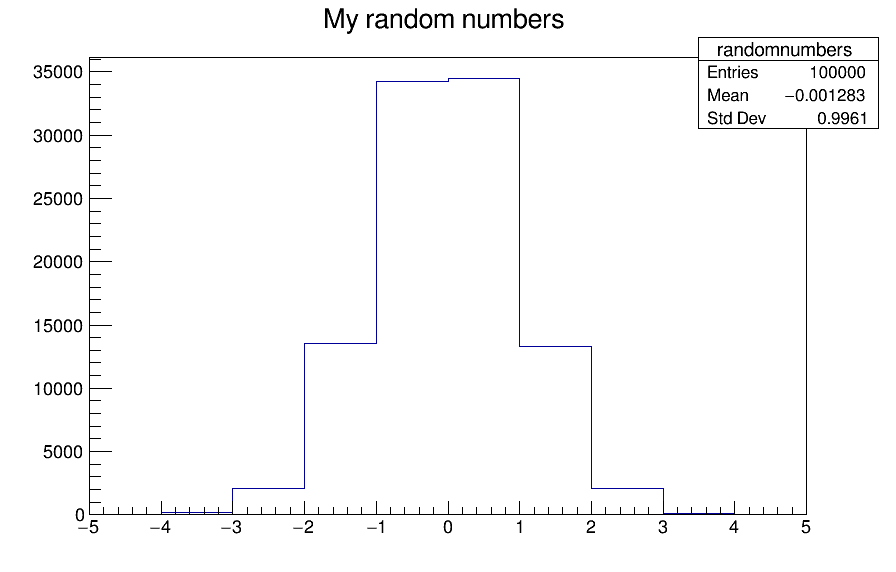

In [5]:
# to draw the histogram we need to define a canvas etc.
c1 = ROOT.TCanvas("c1","c1",900,600)
h.Draw()
c1.Draw()

### Now let's try some other distributions

In [6]:
h_pois = ROOT.TH1F("poisson", "Poissonian numbers", 50, 0, 50)
h_land = ROOT.TH1F("landau", "Landau numbers", 100, 0, 20)

In [7]:
pois_lambda = 15
for i in range(100000):
    h_pois.Fill(prng.Poisson(pois_lambda))

In [8]:
landau_mpv, landau_sigma = 5,1
for i in range(100000):
    h_land.Fill(prng.Landau(landau_mpv, landau_sigma))

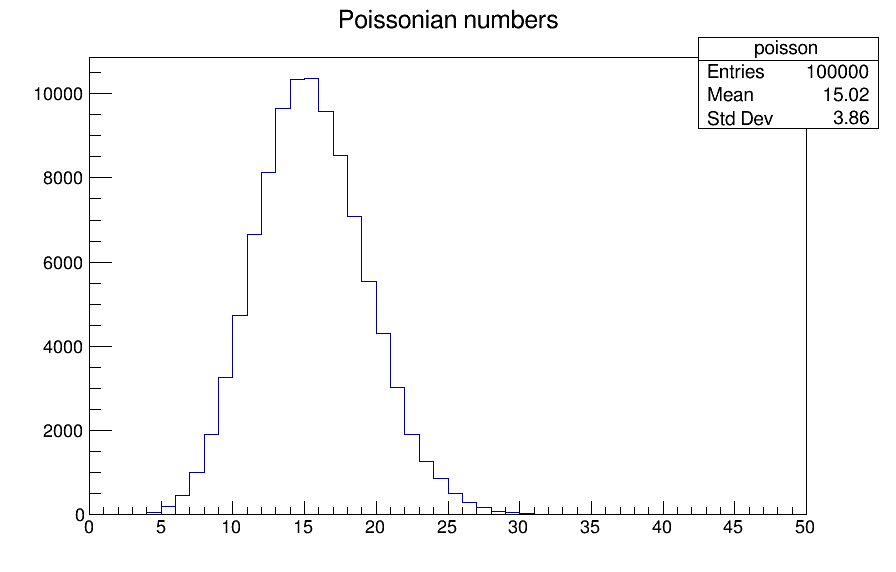

In [9]:
# to draw the histogram we need to define a canvas etc.
c2 = ROOT.TCanvas("c2","c2",900,600)
h_pois.Draw()
c2.Draw()

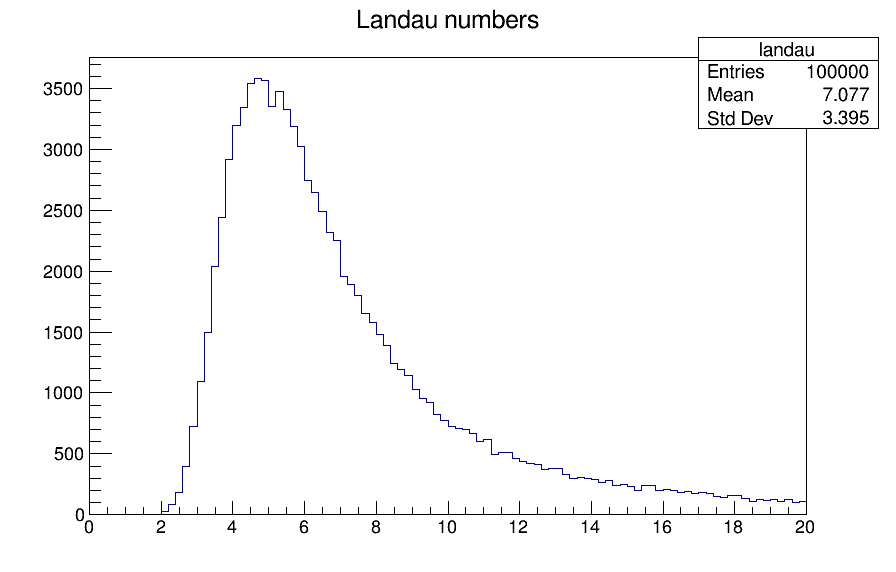

In [10]:
c3 = ROOT.TCanvas("c3","c3",900,600)
h_land.Draw()
c3.Draw()

### We can also combine histograms!

In [11]:
# let's define a total histogram, and two histograms representing two different contributions, 
# each described by an exponential distribution
h_exp = ROOT.TH1F("exponential", "Exponential combined distribution", 100, 0, 250)
h_exp_low = ROOT.TH1F("exp_low", "Exponential low distribution", 100, 0, 250)
h_exp_high = ROOT.TH1F("exp_high", "Exponential high distribution", 100, 0, 250)

# the two exponentials have different values for the parameter that describes the slope
exp_slope_high = 50
exp_slope_low  = 14

In [12]:
# the probabilities of the two processes that the contributions correspond to can be different, 
# let's say the probability of the process corresponding to the high contribution is 0.346%
prob_of_high = 0.00346
print(prob_of_high)

0.00346


In [13]:
for i in range(1000000): # generate 1M random numbers for the combination of the two contributions
    if prng.Rndm() > prob_of_high: # the random number generated this way is uniform in [0,1]
        low_exp = prng.Exp(exp_slope_low)
        h_exp.Fill(prng.Exp(exp_slope_low))
        h_exp_low.Fill(low_exp)
    else:
        high_exp = prng.Exp(exp_slope_high)
        h_exp.Fill(high_exp)
        h_exp_high.Fill(high_exp)

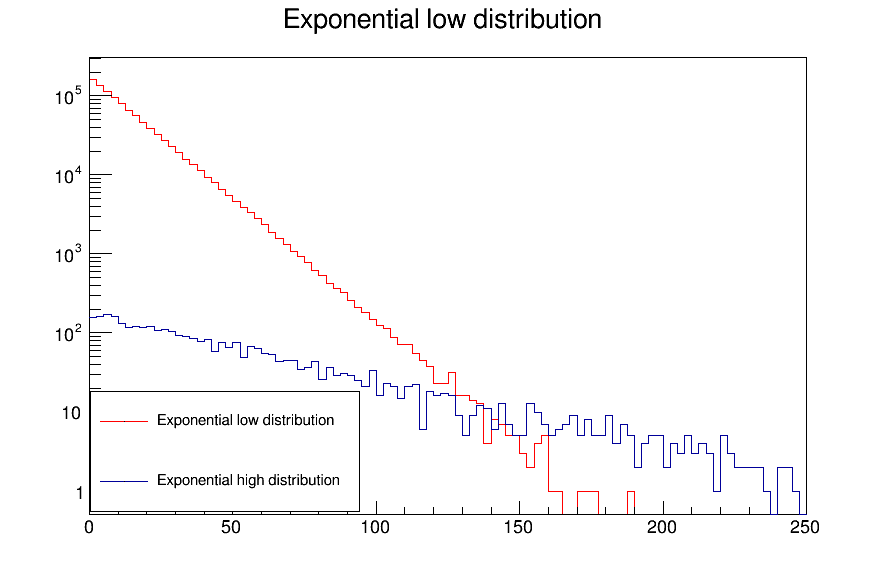

In [14]:
c4 = ROOT.TCanvas("c4","c4",900,600)
c4.SetLogy() # let's use logarithmic y-axis to see the tail in detail
h_exp_low.Draw()
h_exp_high.Draw("SAME")
h_exp_low.SetLineColor(2)
c4.BuildLegend() # build a legend explaining the two histograms
ROOT.gStyle.SetOptStat(0) # turn off the box with statistics, i.e. number of entries etc
c4.Draw()

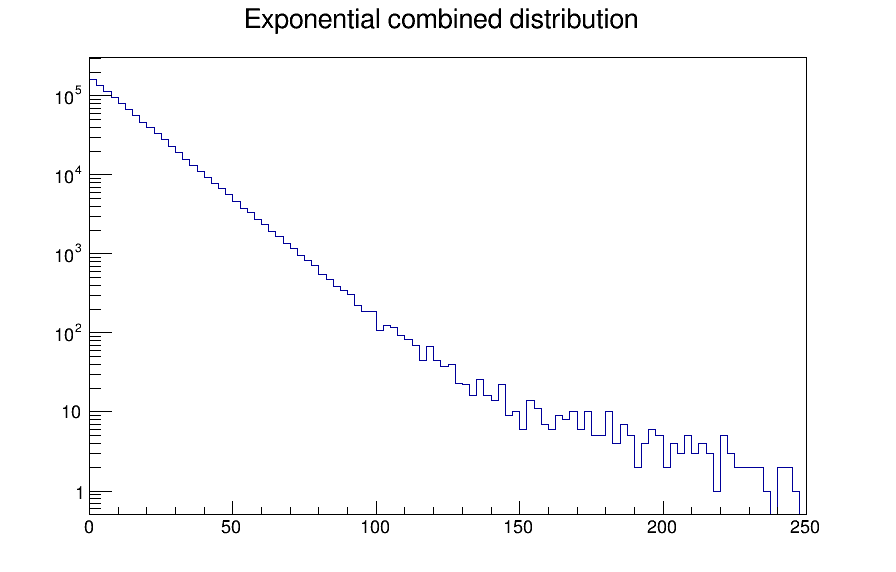

In [15]:
c5 = ROOT.TCanvas("c5","c5",900,600)
h_exp.Draw() # this is the sum, we filled it for both processes
c5.SetLogy()
c5.Draw()

## Defining functions

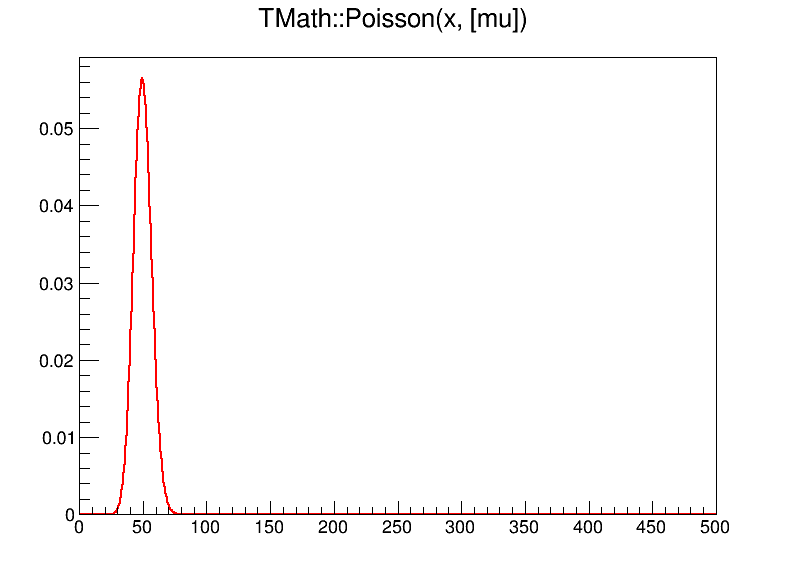

In [16]:
# we can define a function describing the Poisson distribution
# this defines a Poisson with mu=50 over the interval [0, 500]
fPoisson = ROOT.TF1("myPoisson", "TMath::Poisson(x, [mu])", 0, 500)
fPoisson.SetParameter("mu", 50)
fPoisson.SetNpx(1000) # use higher number of points than default (100) when drawing
c6 = ROOT.TCanvas("c6", "c6", 800, 600)
fPoisson.Draw()
c6.Draw()

In [17]:
# print out some info about the function
fPoisson.Print()

Formula based function:     myPoisson 
            myPoisson : TMath::Poisson(x, [mu]) Ndim= 1, Npar= 1, Number= 0 
 Formula expression: 
	TMath::Poisson(x,[mu]) 
Contained histogram
TH1.Print Name  = Func, Entries= 2000, Total sum= 2


In [18]:
# check the parameters
for p in range(0, fPoisson.GetNpar()):
    print("%d: %s = %f" % (p, fPoisson.GetParName(p), fPoisson.GetParameter(p)))

0: mu = 50.000000


In [19]:
# let's also define a gaussian
fGauss = ROOT.TF1("myGauss", "gaus", 0, 500)
fGauss.Print()

# check the parameter values - we haven't set them, so these are the default values
for p in range(0, fGauss.GetNpar()):
    print("%d: %s = %f" % (p, fGauss.GetParName(p), fGauss.GetParameter(p)))

0: Constant = 0.000000
1: Mean = 0.000000
2: Sigma = 0.000000
Formula based function:     myGauss 
              myGauss : gaus Ndim= 1, Npar= 3, Number= 100 
 Formula expression: 
	[Constant]*exp(-0.5*((x-[Mean])/[Sigma])*((x-[Mean])/[Sigma])) 


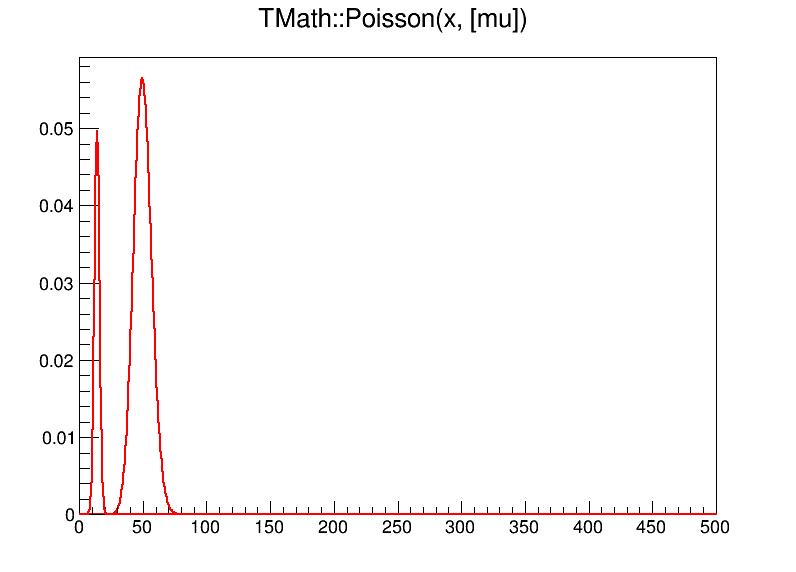

In [20]:
# set the parameter values
fGauss.SetParameter("Constant", 0.05) # to easily see it next to the Poisson
fGauss.SetParameter("Mean", 14)
fGauss.SetParameter("Sigma", 2)
fGauss.SetNpx(1000) # use higher number of points than default (100) when drawing
c6.cd()
fGauss.Draw("SAME")
c6.Draw()


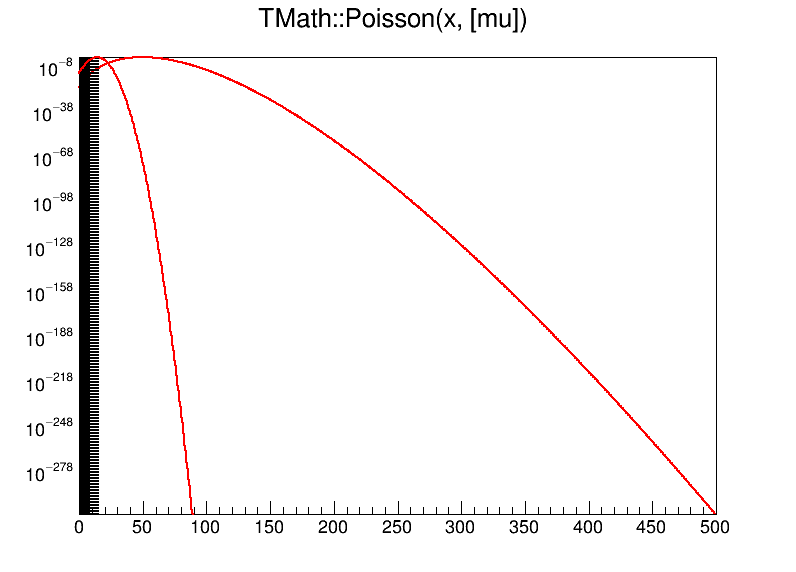

In [21]:
# let's make the y axis logarithmic to more easily see both large and small values
c6.SetLogy(1)
c6.Draw()

# Now to the task of generating the distribution of tracks per BC
What do we know?
* The number of interactions per BC follows a Poisson distribution, like `fPoisson` above
* The number of tracks per interaction follows the sum of two exponential terms

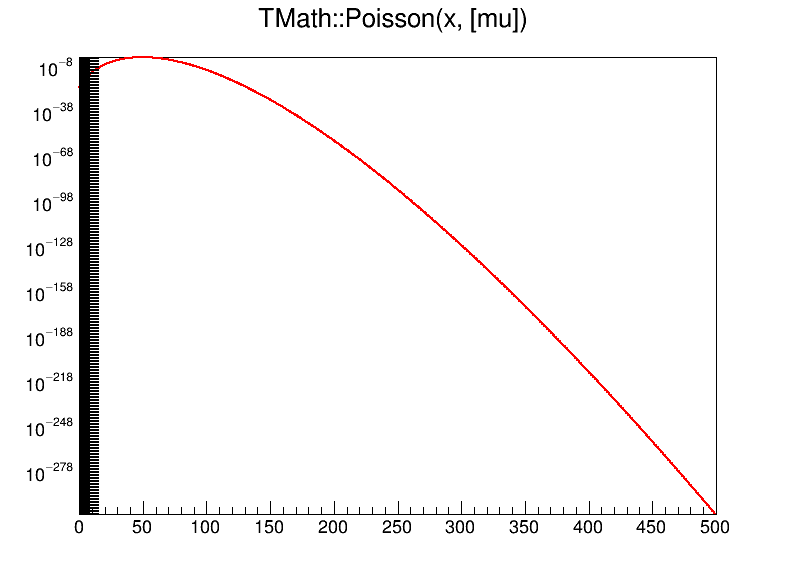

In [23]:
# make a function that 